In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Este archivo tiene información de usuarios que compran o no compran un determinado producto
# Importamos el dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

**¿Qué dimensiones estoy tomando?**
Edad
Salario
Target


In [3]:
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
# Dividimos el dataset en training y test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Creacion del modelo Naive Bayes
# y entrenamiento del mismo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
# Prediccion del conjunto de prueba
y_pred = classifier.predict(X_test)

In [8]:
# Matriz de Confusión
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[65  3]
 [ 7 25]]


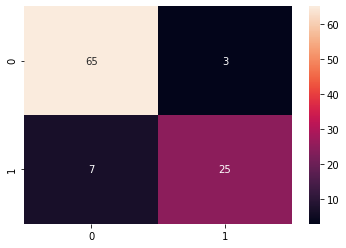

In [9]:
print(cm)  # Tenemos 7 falsos positivos y 3 falsos negativos. Total de la muestra 100 - 
sn.heatmap(cm, annot=True)
plt.show()


In [10]:
from sklearn.metrics import accuracy_score
#Exactitud - La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado
accuracy_score(y_test, y_pred)

0.9

In [16]:
# Precision - Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
#Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8928571428571429

In [17]:
# Recall - ¿Qué porcentaje de los valores positivos fueron bien identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.78125

In [18]:
#rendimiento combinado de la precisión y la sensibilidad  
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred)

0.8333333333333334

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


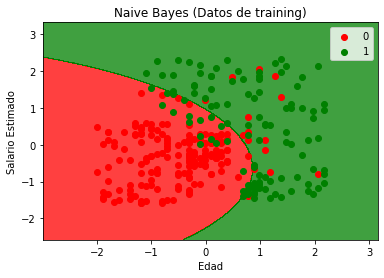

In [14]:
# Visualización del set de training
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Datos de training)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


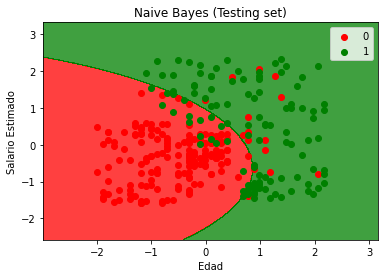

In [15]:
# Visualización del set de Testing
from matplotlib.colors import ListedColormap
X_train, y_train = X_set, y_set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()